In [1]:
# Import the whisker counter script
import whisker_counter as wc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Reload the module 
import importlib
importlib.reload(wc)

<module 'whisker_counter' from 'c:\\Users\\wanglab\\Desktop\\licking-and-spike-analysis\\Whisker_Curation\\whisker_counter.py'>

In [3]:
# Path to your lines.csv file
CSV_PATH = "C:\\Users\\wanglab\\Desktop\\Mel\\shortened\\lines_output.csv"

# Maximum number of whiskers to analyze
MAX_WHISKERS = 10

In [4]:
# Run the main analysis
result = wc.analyze_whisker_distribution(CSV_PATH, max_whiskers=MAX_WHISKERS, verbose=True)

Analysis of: lines_output.csv
Total frames analyzed: 117750

Whisker Distribution:
----------------------------------------
Frames with 1 whisker(s):      0 ( 0.00%)
Frames with 2 whisker(s):    530 ( 0.45%)
Frames with 3 whisker(s):    603 ( 0.51%)
Frames with 4 whisker(s):   1037 ( 0.88%)
Frames with 5 whisker(s):  98715 (83.83%)
Frames with 6 whisker(s):  14564 (12.37%)
Frames with 7 whisker(s):   2094 ( 1.78%)
Frames with 8 whisker(s):    169 ( 0.14%)
Frames with 9 whisker(s):     28 ( 0.02%)
Frames with 10 whisker(s):      6 ( 0.01%)
----------------------------------------


## Calculate Whisker Length

Row Index selects for individual whiskers. Length is calculated as the sum of straight-line distances between consecutive coordinate points along the whisker.

In [5]:
row_index = 400
whisker_data = wc.get_whisker_from_row(CSV_PATH, row_index)

print(f"Whisker Data from Row {row_index}:")
print(f"  Frame: {whisker_data['frame']}")
print(f"  Number of Points: {whisker_data['num_points']}")
print(f"  Total Length: {whisker_data['length']:.2f} pixels")
print(f"  X Coordinates: {whisker_data['x_coords']}")
print(f"  Y Coordinates: {whisker_data['y_coords']}")

Whisker Data from Row 400:
  Frame: 80
  Number of Points: 5
  Total Length: 170.38 pixels
  X Coordinates: 299.0,246.0,208.8,175.1,140.2
  Y Coordinates: 212.2,219.1,228.5,243.2,266.2


## Find Shortest Whiskers in Frames with >X Whiskers

Analyze frames that have more than a threshold number of whiskers and find the shortest whisker in each:


Analysis: Frames with MORE than 5 whiskers
Total frames in dataset: 117750
Frames with >5 whiskers: 16865

Shortest Whisker Statistics:
  Mean shortest length: 83.20 pixels
  Median shortest length: 81.15 pixels
  Min shortest length: 48.86 pixels
  Max shortest length: 177.88 pixels
  Std Dev: 23.80 pixels




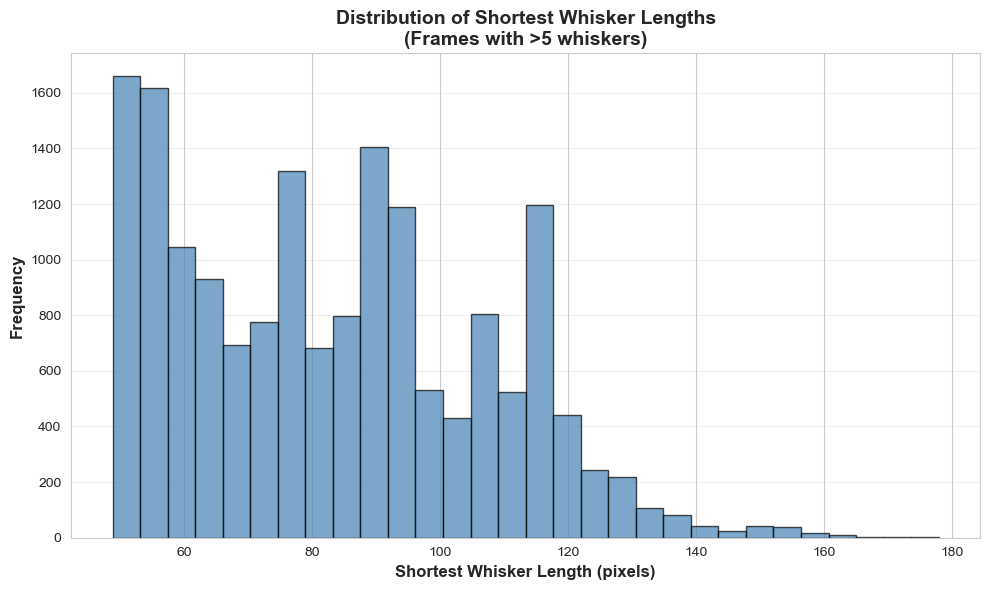


Results Table:


,Frame,Whisker_Count,Shortest_Length,Mean_Length,Longest_Length
491,491,6,59.257405,213.005102,285.166274
492,492,6,59.114380,212.658420,285.055663
493,493,6,59.449811,210.855247,287.105913
494,494,6,58.437060,214.813959,286.345946
495,495,6,68.682308,216.695226,286.747211
...,...,...,...,...,...
117540,117540,6,67.222693,205.584812,289.336933
117593,117593,6,147.966027,212.920221,282.056408
117600,117600,6,52.099586,201.774648,303.909956
117602,117602,6,51.016566,198.209809,310.283399


In [6]:
# Set threshold for minimum number of whiskers
# For example, if you have 5 real whiskers, frames with >5 have false detections
min_whisker_threshold = 5

# Get results table and plot distribution (all print statements in script)
fig, results_table = wc.plot_shortest_whisker_distribution(CSV_PATH, min_whisker_threshold)

# Display the results table
print("\nResults Table:")
display(results_table)